In [48]:
import importlib
import os
import sys
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from dotenv import load_dotenv

In [49]:
# Makes sure modules are available to the notebook that acts as an entrypoint

load_dotenv()

parent_dir = os.path.abspath('..')

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [50]:
# Manually reloading python module such that jupyter reflects changes without kernel restart

import plutus.code.calc.rsi as rsi

importlib.reload(rsi);

In [51]:
import plutus.code.api_connector as ac

importlib.reload(ac);

In [52]:
data_source = 'uds'

ticker = 'TSLA'
start_date = '2023-05-24-00:00'
end_date = '2023-05-25-00:00'
n_periods = 1

api_connector = ac.ApiConnector(data_source)
api_connector.ticker = ticker
api_connector.start_date = start_date
api_connector.end_date = end_date
api_connector.n_periods = n_periods

df = api_connector.request_daily_prices()

In [53]:
rsi_calculator = rsi.RelativeStrengthIndexCalculator()

rsi_calculator.dataframe = df

rsi_calculator.calculate_rsi()

df

timestamp  gmtoffset             datetime    open    high     low  \
0    1684915200          0  2023-05-24 02:00:00  184.43  184.69  184.04   
1    1684915260          0  2023-05-24 02:01:00  184.10  184.26  184.10   
2    1684915320          0  2023-05-24 02:02:00  184.21  184.30  184.16   
3    1684915380          0  2023-05-24 02:03:00  184.39  184.39  184.29   
4    1684915440          0  2023-05-24 02:04:00  184.26  184.30  184.25   
..          ...        ...                  ...     ...     ...     ...   
933  1684972500          0  2023-05-24 17:55:00  185.05  185.10  185.01   
934  1684972560          0  2023-05-24 17:56:00  185.01  185.05  185.00   
935  1684972620          0  2023-05-24 17:57:00  184.99  185.10  184.96   
936  1684972680          0  2023-05-24 17:58:00  185.09  185.15  185.08   
937  1684972740          0  2023-05-24 17:59:00  185.16  185.25  185.09   

      close  volume        rsi  
0    184.04    6820        NaN  
1    184.20    7256        NaN  
2    184.30    7687        NaN  
3    184.30    1806        NaN  
4    184.25    3717        NaN  
..      ...     ...        ...  
933  185.10    1803  57.280058  
934  185.00    4215  51.496384  
935  185.00    3754  51.496384  
936  185.15    4831  58.743332  
937  185.25   15423  62.740160  

[938 rows x 9 columns]

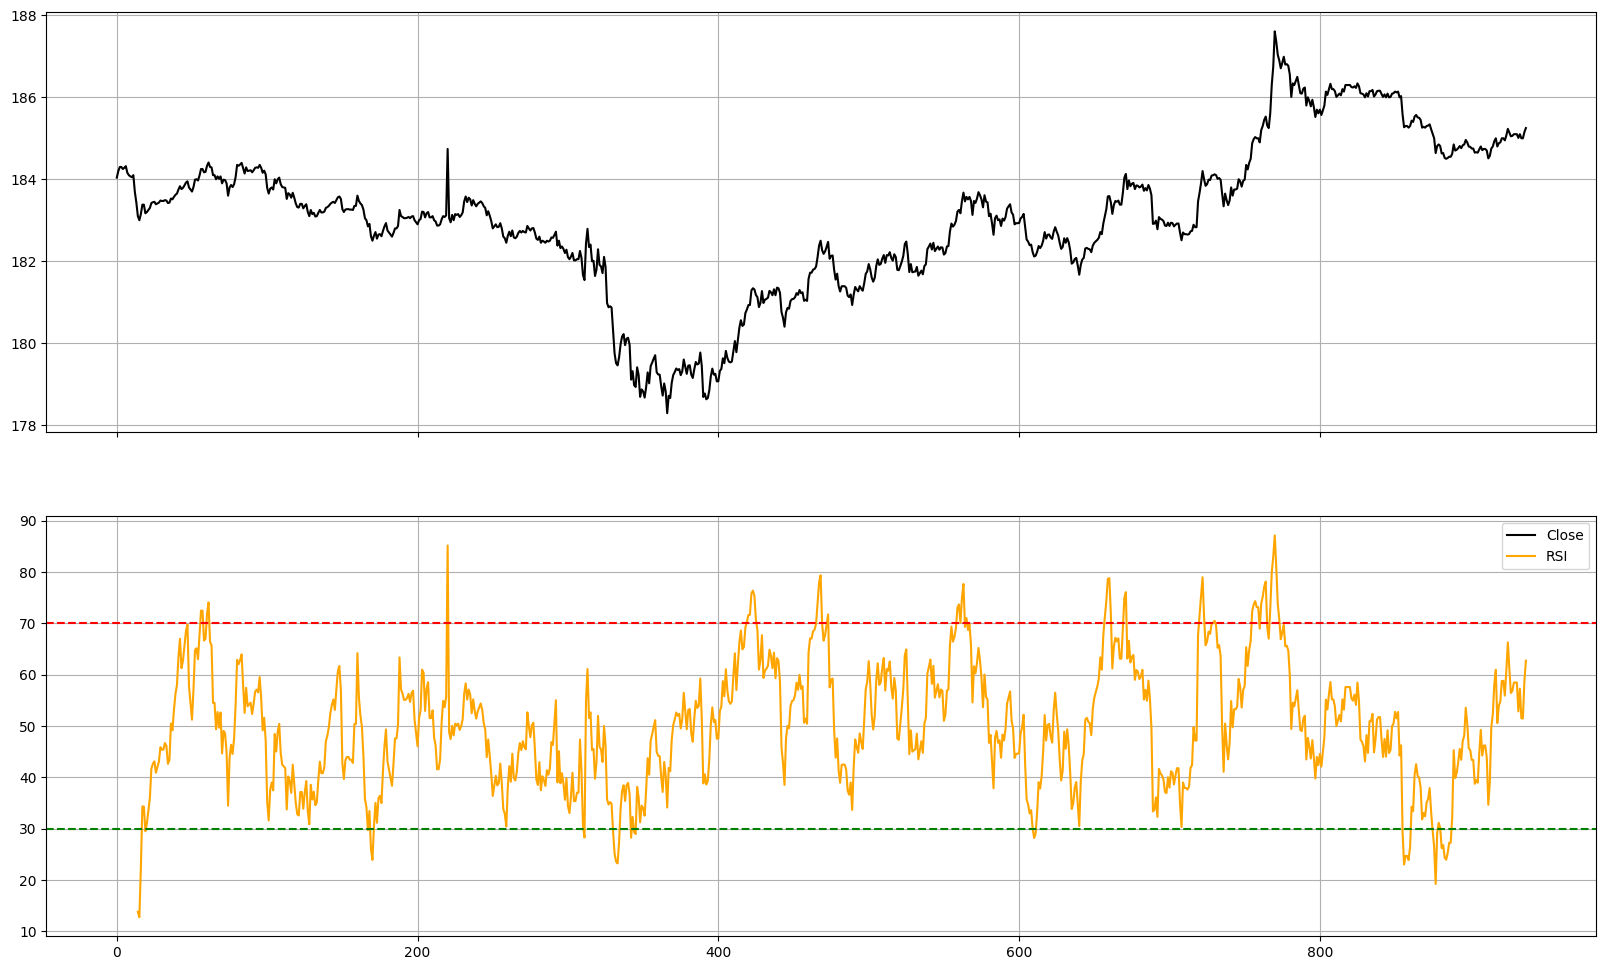

In [54]:
fig, ax = plt.subplots(2, figsize=(20, 12), sharex=True)

dates = df.index

prices = df['close'].values

rsis = df['rsi'].values

legend_elements = [
  Line2D([0], [0], color='black', label='Close'),

  Line2D([0], [0], color='orange', label='RSI'),
]

ax[0].plot(df['close'], c='black')

ax[1].plot(df['rsi'], c='orange')

ax[0].grid()

# # Add two horizontal lines, signalling the buy and sell ranges: oversold and overbought
ax[1].axhline(30, linestyle='--', linewidth=1.5, color='green')

ax[1].axhline(70, linestyle='--', linewidth=1.5, color='red')

ax[1].grid()

plt.legend(handles=legend_elements);